In [1]:
# import the required libraries in the environment
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

#check Pytorch version
torch.__version__

'2.2.1+cu121'

In [2]:
# setup device agnostic code
device = 'cude' if torch.cuda.is_available() else 'cpu'

print(f'Using device {device}')

Using device cude


In [3]:
# lets create a weight

weight =0.3
bias = 0.9

start = 0
end = 2
step = 0.02

x = torch.arange(start,end,step).unsqueeze(dim=1)

y= weight*x+bias

In [4]:
#getting the 0.8 percent data mark
cut_len = int(len(x)*0.8)
cut_len

80

In [5]:
# segregation of test and train dataset in 20% and 80 % respectevely
X_train,y_train = x[:cut_len],y[:cut_len]

X_test,y_test=x[cut_len:],y[cut_len:]

len(X_train),len(y_train),len(X_test),len(y_test)

(80, 80, 20, 20)

In [6]:
def plot_the_predictions(traindata = X_train,
                         traindatalabel = y_train,
                         testdata = X_test,
                         testdatalabel = y_test,
                         predictions = None):
  plt.figure(figsize=(10,7))
  plt.scatter(traindata,traindatalabel,c='b',s=4,label ='Train Data')
  plt.scatter(testdata,testdatalabel,c='g',s=4,label='Testingdata')
  if predictions is not None:
    plt.scatter(testdata,predictions,c='r',s=4,label='Predicted Data')
  plt.legend(prop={'size':12})

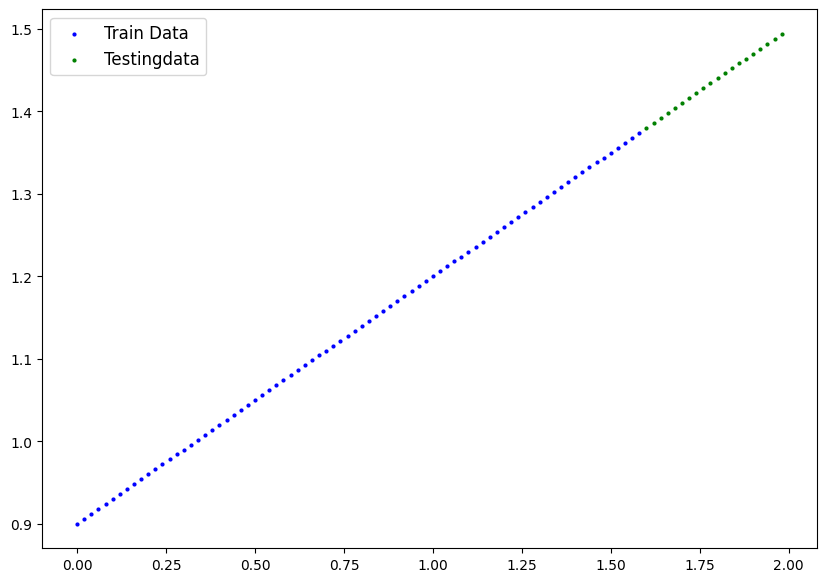

In [7]:
plot_the_predictions()

In [8]:
class RegressionModelAssignment(nn.Module):

  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  #create a forwared funtions
  def forward(self,x:torch.Tensor) ->torch.Tensor:
    return self.weight*x+self.bias

In [9]:
# create a manual seed
torch.manual_seed(42)
model = RegressionModelAssignment()
model.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
# create a loss fucntion
loss_fn = nn.L1Loss()

#create a optimizer
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.01)

In [11]:
# epochs
epochs = 300

#experimenting
epoch_count = []
loss_data=[]
test_loss_data = []

#creating a training and testing loop
for epoch in range(epochs):
  #set the model in train model
  model.train()

  #forward step
  y_pred = model(X_train)

  #calculating loss function
  loss = loss_fn(y_pred,y_train)

  # setting the optimizer to zero grad as it by default accumulate the values
  optimizer.zero_grad()

  #backward propagation
  loss.backward()

  #optimizer
  optimizer.step()

  # testing mode
  model.eval()

  #forward step
  with torch.inference_mode():
    test_pred = model(X_test)

  #loss calculation
  test_loss =loss_fn(test_pred,y_test)

  if epoch%20==0:
    epoch_count.append(epoch)
    loss_data.append(loss.detach().numpy())
    test_loss_data.append(test_loss.detach().numpy())
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.7422052025794983 | Test Loss: 0.6813738942146301
Epoch: 20 | Loss: 0.41738519072532654 | Test Loss: 0.1985538750886917
Epoch: 40 | Loss: 0.16582420468330383 | Test Loss: 0.19161489605903625
Epoch: 60 | Loss: 0.13492025434970856 | Test Loss: 0.2436906397342682
Epoch: 80 | Loss: 0.11619293689727783 | Test Loss: 0.2253524363040924
Epoch: 100 | Loss: 0.09796369075775146 | Test Loss: 0.19259914755821228
Epoch: 120 | Loss: 0.07977813482284546 | Test Loss: 0.156447634100914
Epoch: 140 | Loss: 0.061592668294906616 | Test Loss: 0.12029661238193512
Epoch: 160 | Loss: 0.04340718686580658 | Test Loss: 0.08482521772384644
Epoch: 180 | Loss: 0.025222454220056534 | Test Loss: 0.04867418482899666
Epoch: 200 | Loss: 0.007037716452032328 | Test Loss: 0.012523150071501732
Epoch: 220 | Loss: 0.010932961478829384 | Test Loss: 0.006088173482567072
Epoch: 240 | Loss: 0.010932961478829384 | Test Loss: 0.006088173482567072
Epoch: 260 | Loss: 0.010932961478829384 | Test Loss: 0.00608817348256

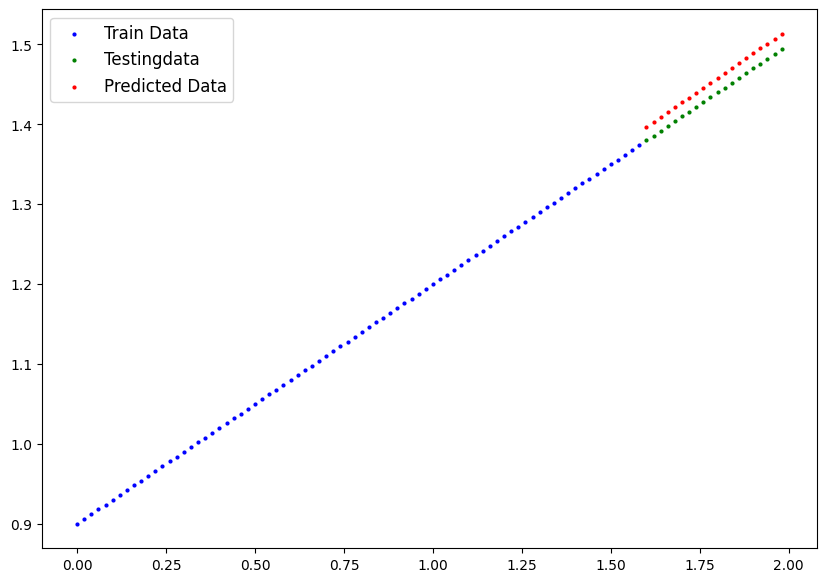

In [12]:
plot_the_predictions(predictions=test_pred)

In [13]:
model.state_dict()

OrderedDict([('weight', tensor([0.3071])), ('bias', tensor([0.9053]))])

Text(0.5, 1.0, 'Training and testing Loss curve')

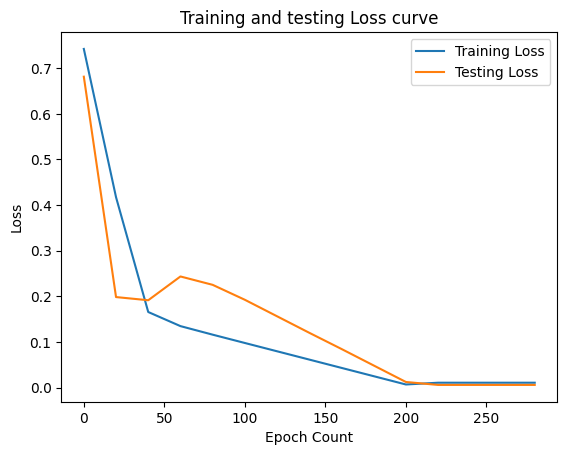

In [14]:
# plotting the loss curve
plt.plot(epoch_count,loss_data,label='Training Loss')
plt.plot(epoch_count,test_loss_data,label='Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch Count')
plt.legend()
plt.title('Training and testing Loss curve')

## save the pytorch model

In [20]:
#saving the model Always save the state_dict rather than the whole model
from pathlib import Path

# 1. create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2 create model save path
MODEL_NAME = '01_PyTorch_Workflow_Assigment.pth'
MODEL_PATH_SAVE= MODEL_PATH/MODEL_NAME

# 3. Save the model state dict
print(f'Saving model to: {MODEL_PATH_SAVE}')
torch.save(obj=model.state_dict(),
           f=MODEL_PATH_SAVE)

Saving model to: models/01_PyTorch_Workflow_Assigment.pth


In [21]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1692 Mar 23 11:29 01_PyTorch_Workflow_Assigment.pth


# load the pytorch model

In [22]:
# instantiate the model instance
model_for_test = RegressionModelAssignment()

model_for_test.load_state_dict(torch.load(MODEL_PATH_SAVE))

model_for_test.eval()

with torch.inference_mode():
  y_test_pred2 = model_for_test(X_test)

model_for_test.state_dict()

OrderedDict([('weight', tensor([0.3071])), ('bias', tensor([0.9053]))])

In [23]:
with torch.inference_mode():
    test_pred = model(X_test)
model.state_dict()

OrderedDict([('weight', tensor([0.3071])), ('bias', tensor([0.9053]))])

In [24]:
test_pred == y_test_pred2

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])